# Networks

This file describes the different types of networks (graphs) created for this project.<br>
The types of networks:

A) Style and movement networks<br>
B) Influence, friendship graphs of painters<br>
B2) time-and-place network of painters.<br>

The networks can be found in the respective files:

style_movement_networks.ipynb,<br> painters_network.ipynb,<br> time_and_place.ipynb.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

Load the graphs and data

In [3]:
wikiart_artists_styles = pd.read_csv('..\datasets\wikiart_artists_styles_grouped.csv')
wikiart_styles = wikiart_artists_styles['style'].unique(); wikiart_artists = wikiart_artists_styles['artist'].unique(); wikiart_movements = wikiart_artists_styles['movement'].unique()
artists = pd.read_csv('../datasets/artists.csv')
artists[0:4]

,artist,Nationality,birth_place,birth_year,styles,styles_extended,StylesYears,StylesCount,movement,ArtMovement,...,LastYear,Places,PlacesYears,PlacesCount,PaintingSchool,Influencedby,Influencedon,Pupils,Teachers,FriendsandCoworkers
0,Ad Reinhardt,American,Buffalo,1913.0,"Abstract Art, Abstract Expressionism, Color Fi...","{Abstract Art:15},{Abstract Expressionism:5},{...","Expressionism:1944-1946,,Abstract Art:1937-194...","{Expressionism:7}, {Abstract Art:15}, {Color F...",Abstract Expressionism,"{Abstract Expressionism,Minimalism:52},",...,1966.0,"US, NY, Canberra, Fort Worth, Buffalo, Austral...","New York City:1938-1966,,NY:1938-1966,,US:1938...","{New York City:29},{NY:31},{US:32},{Buffalo:2}...","New York School,American Abstract Artists,Iras...","Piet Mondrian,Kazimir Malevich,Josef Albers,","Donald Judd,Barnett Newman,Mark Rothko,Frank S...",NaN,NaN,"Jackson Pollock,"
1,Adnan Coker,Turkish,NaN,NaN,"Abstract Art, Abstract Expressionism","{Abstract Art:25},{Abstract Expressionism:3}","Abstract Art:1992-2008,,Abstract Expressionism...","{Abstract Art:25}, {Abstract Expressionism:3}",Abstract Art,"{Abstract Art:28},",...,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akkitham Narayanan,Indian,Kerala,1939.0,Abstract Art,{Abstract Art:17},"Abstract Art:1974-1974,",{Abstract Art:17},Abstract Art,"{Abstract Art:17},",...,1974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alberto Magnelli,"Italian,French",Florence,1888.0,"Abstract Art, Art Nouveau (Modern), Cubism, Ex...","{Abstract Art:19},{Art Nouveau (Modern):2},{Cu...","Abstract Art:1916-1971,,Cubism:1914-1935,,Meta...","{Abstract Art:21}, {Cubism:10}, {Metaphysical ...",Abstract Art,"{Abstract Art,Cubo-Futurism,Concrete Art (Conc...",...,1971.0,NaN,NaN,NaN,Abstraction-Création,NaN,NaN,NaN,NaN,NaN


In [ ]:
G_artists_A = nx.Graph(); G_artists_A.add_nodes_from(wikiart_artists)
G_styles_A = nx.read_gexf("gexf/G_styles_A.gexf")
G_movements_A = nx.read_gexf("gexf/G_movements_A.gexf")
G2_copy = nx.read_gexf("gexf/G2_copy.gexf") #Modified G_styles_A
G3_copy = nx.read_gexf("gexf/G3_copy.gexf") #Modified G_movements_A

G_geo_B_copy = nx.read_gexf("gexf/G_geo_B.gexf") #B2
G_influencedby_B = nx.read_gexf("gexf/G_influencedby_B.gexf")
G_influencedon_B = nx.read_gexf("gexf/G_influencedon_B.gexf")
G_friendsandcoworkers_B_copy = nx.read_gexf("gexf/G_friendsandcoworkers_B.gexf")
G_artists_B = nx.read_gexf("gexf/G_artists_B.gexf")

## Multilayer network visualization of styles and movements (WikiArt only)

https://github.com/jkbren/matplotlib-multilayer-network<br>
https://nbviewer.org/github/jkbren/matplotlib-multilayer-network/blob/master/matplotlib-multilayer-networks.ipynb

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline

<details><summary>Consider this if you want proper cross-layer edges</summary>

```python

for i in range(len(wikiart_artists_styles)):
    G_artists_A.add_edge(wikiart_artists_styles['artist'][i], wikiart_artists_styles['style'][i])
    G_styles_A.add_edge(wikiart_artists_styles['style'][i], wikiart_artists_styles['movement'][i])
    G_movements_A.add_edge(wikiart_artists_styles['movement'][i], wikiart_artists_styles['artist'][i])

```

</details>


In [178]:
pos1 = nx.spring_layout(G_artists_A, k=0.9, iterations=2)
pos2 = nx.spring_layout(G_styles_A, k=2.4,iterations=70)
pos3 = nx.spring_layout(G3_copy, k=5.4,iterations=7) #G_movements_A is too dense

Some other layout options:<br>
https://stackoverflow.com/questions/14283341/how-to-increase-node-spacing-for-networkx-spring-layout

<details><summary>Fruchterman-Reingold modified</summary>
    
```python

def _fruchterman_reingold(
    A, k=None, pos=None, fixed=None, iterations=50, threshold=1e-4, dim=2, seed=None
):
    # Position nodes in adjacency matrix A using Fruchterman-Reingold
    # Entry point for NetworkX graph is fruchterman_reingold_layout()
    import numpy as np

    try:
        nnodes, _ = A.shape
    except AttributeError as err:
        msg = "fruchterman_reingold() takes an adjacency matrix as input"
        raise nx.NetworkXError(msg) from err

    if pos is None:
        # random initial positions
        pos = np.asarray(seed.rand(nnodes, dim), dtype=A.dtype)
    else:
        # make sure positions are of same type as matrix
        pos = pos.astype(A.dtype)

    # optimal distance between nodes
    if k is None:
        k = np.sqrt(1.0 / nnodes)
    # the initial "temperature"  is about .1 of domain area (=1x1)
    # this is the largest step allowed in the dynamics.
    # We need to calculate this in case our fixed positions force our domain
    # to be much bigger than 1x1
    t = max(max(pos.T[0]) - min(pos.T[0]), max(pos.T[1]) - min(pos.T[1])) * 0.1
    # simple cooling scheme.
    # linearly step down by dt on each iteration so last iteration is size dt.
    dt = t / (iterations + 1)
    delta = np.zeros((pos.shape[0], pos.shape[0], pos.shape[1]), dtype=A.dtype)
    # the inscrutable (but fast) version
    # this is still O(V^2)
    # could use multilevel methods to speed this up significantly
    for iteration in range(iterations):
        # matrix of difference between points
        delta = pos[:, np.newaxis, :] - pos[np.newaxis, :, :]
        # distance between points
        distance = np.linalg.norm(delta, axis=-1)
        # enforce minimum distance of 0.01
        np.clip(distance, 0.01, None, out=distance)
        # displacement "force"
        displacement = np.einsum(
            "ijk,ij->ik", delta, (k * k / distance**2 - A * distance / k)
        )
        
        # ADD THIS LINE - prevent things from flying off into infinity if not connected
        displacement = displacement - pos / ( k * np.sqrt(nnodes))

        # update positions
        length = np.linalg.norm(displacement, axis=-1)
        length = np.where(length < 0.01, 0.1, length)
        delta_pos = np.einsum("ij,i->ij", displacement, t / length)
        if fixed is not None:
            # don't change positions of fixed nodes
            delta_pos[fixed] = 0.0
        pos += delta_pos
        # cool temperature
        t -= dt
        if (np.linalg.norm(delta_pos) / nnodes) < threshold:
            break
    return pos

```
</details>


In [179]:
#Setup for spring_layout
cols = ['mediumseagreen', 'darksalmon','steelblue' ]#Colors
np.random.seed(42)
graphs = [G_artists_A,G_styles_A, G3_copy]

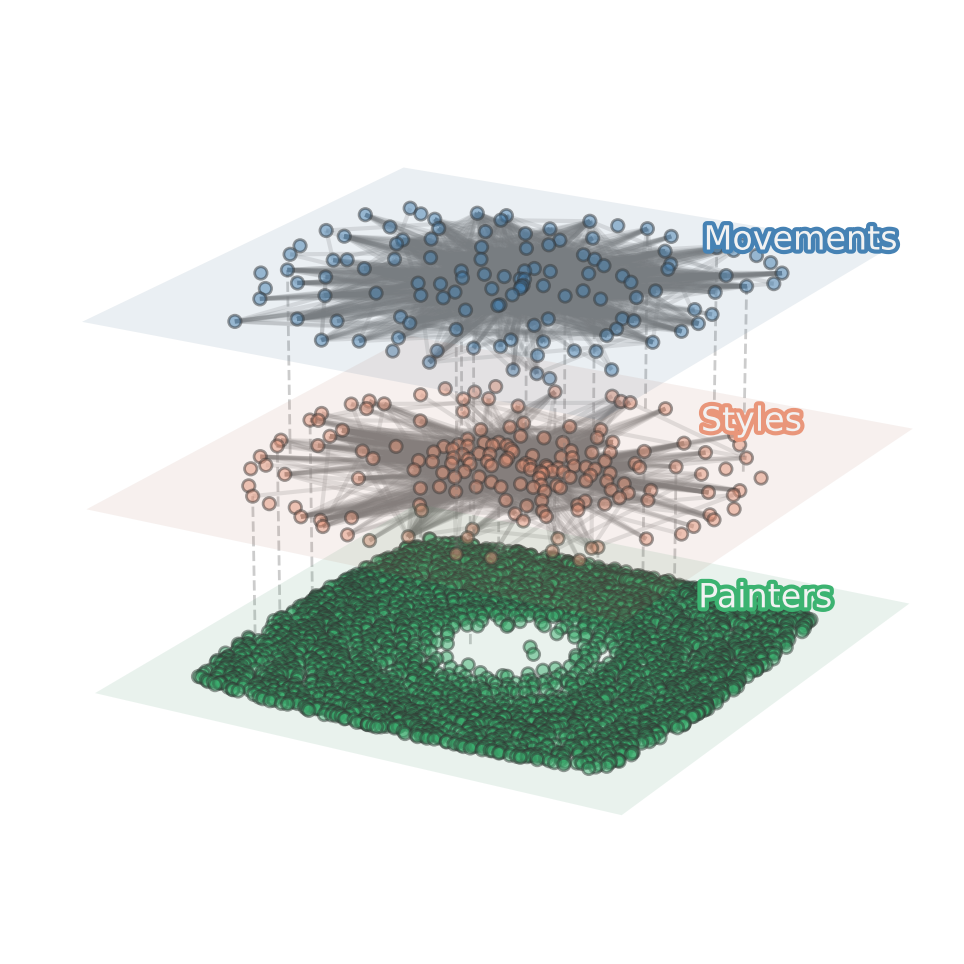

In [183]:
w = 8
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    if gi == 0:
        pos = pos1
    if gi == 1:
        pos = pos2
    if gi == 2:
        pos = pos3
    
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    #Inbetween layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, color="grey", zorder=gi, alpha=0.2)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2',  alpha=0.5, zorder=gi+1)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    if gi == 0:
        text = "Painters"
    if gi == 1:
        text = "Styles"
    if gi == 2:
        text = "Movements"
    layertext = ax.text(0.0, 0.85, gi*0.95+0.5, text,
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=3, foreground=cols[gi]),
                                      path_effects.Normal()])

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 9.5

ax.set_axis_off()

# plt.savefig('multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()


### PageRank / Wiki Connections:
<details><summary><u>Examples</u></summary>
    
The Python Class 6 notebook had a good example for PageRank

Wiki Connections: full dataset http://www.iesl.cs.umass.edu/data/data-wiki-links<br>
smaller dataset: https://snap.stanford.edu/data/wikispeedia.html

</details>

## Network connection: Six Degrees of Francis Bacon
Network of the people connected to Francis Bacon, sadly the people in the set are mostly all born in the 16th century and are English so most philosophers in this list are not super relevant, there is no Kant, Nietzsche, etc.  But good example of a network

http://www.sixdegreesoffrancisbacon.com/?ids=10000473&min_confidence=60&type=network

<details><summary><u>Code for obtaining graph</u></summary>
<p>
    
```python
import igraph as ig #To install: conda install -c conda-forge python-igraph  
people = pd.read_csv('datasets/SDFB_people_.csv')
relationships = pd.read_csv('datasets/SDFB_relationships_.csv')

#I used igraph, because it's faster than networkx, and graph-tool sucks on Windows
network = relationships.rename(columns={'id': 'relationship_id', }).drop(columns=['created_by', 'approved_by', 'citation'])
print(network.head(), '\n')
cols = network.columns.tolist()
cols = cols[1:3] + cols[0:1] + cols[3:]
network = network[cols]
network = network[network['person1_index'] != 10050190] #for some reason, there is no person with this id, I did a loop
# I used the documentation here: https://python.igraph.org/en/stable/generation.html#from-pandas-dataframe-s  this I followed
# this is important too: https://python.igraph.org/en/stable/api/igraph.Graph.html#DataFrame  
g = ig.Graph.DataFrame(network, directed=False, vertices=people[['id', 'display_name','historical_significance','birth_year','death_year']], use_vids=False)
print(g.summary().replace(',', '\n'))
```
    
</p>
</details>

<details><summary><u>Code for filtering</u></summary>
<p>
    
```python
filtered = g.vs.select(_degree = 0) #https://python.igraph.org/en/stable/tutorial.html#selecting-vertices-and-edges
g.delete_vertices(filtered)

import cairo #Needed for plotting #import cairocffi as cairo  # can do matplotlib too
#layout = g.layout(layout='auto')
#ig.plot(g, layout = layout) #ig.plot(g) #looks even worse

```
    
</p>
</details>

<details><summary><u>Code for obtaining graph</u></summary>
<p>
    
```python
layout = g.layout(layout='reingold_tilford_circular') #kamada_kawai requires too much computing, 'fruchterman_reingold' is too dense
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = "blue"
visual_style['bbox'] = (900, 900)
visual_style["layout"] = layout
#ig.plot(g, **visual_style) #Commented out because it takes big memory
# Needs improvement, but it's a start
```
    
</p>
</details>
